In [1]:
import pandas as pd
from scipy import stats
import numpy as np
import collections
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from TumorDecon_Functions import *

### Read data

In [2]:
# Mixture data

noisy_dfs = {} 
for k in range(5, 51, 5):
    noisy_df = pd.read_csv('Data/Simulated_data/Noisy_df_'+str(k)+'.txt', sep='\t')
    noisy_df.set_index('Unnamed: 0', inplace=True)
    noisy_dfs[k] = noisy_df

In [3]:
# Signature matrix

lm22 = pd.read_csv('Data/LM22/LM22.txt', sep='\t')
lm22.set_index('Gene symbol', inplace=True)

selected_cols = ['B cells naive', 'B cells memory', 'T cells CD8',
       'T cells CD4 naive', 'T cells CD4 memory resting', 'T cells CD4 memory activated',
       'T cells gamma delta', 'NK cells resting',
       'NK cells activated', 'Monocytes', 'Macrophages M0', 'Macrophages M1',
       'Macrophages M2', 'Dendritic cells resting',
       'Dendritic cells activated', 'Neutrophils']
signature_df = lm22[selected_cols]

In [4]:
# Gene sets

gene_set_df = pd.read_csv('Data/LM22/Selected_cols_upgenes.csv')
gene_set_df.drop('Unnamed: 0', axis=1, inplace=True)

gene_sets = {}
for cell in gene_set_df.columns:
    gene_sets[cell] = gene_set_df[cell].dropna()

In [5]:
# Ground truth fractions

proportions = pd.read_csv('Data/Simulated_data/Proportions.csv')
proportions.drop('Unnamed: 0', axis=1, inplace=True)
proportions = np.array(proportions)

exp_freqs = pd.DataFrame(proportions, columns=lm22.columns)

### Results with LM22

In [6]:
def get_results_lm22(signature_df, df, gene_sets, exp_freqs, cell_types, k):
    print(k)
    
    Decon_freqs = pd.read_csv('Results/Simulated_data/Noisy_'+str(k)+'/'+str(k)+'_R_Decon_freqs.csv')
    Decon_freqs.drop('Unnamed: 0', axis=1, inplace=True)
    Decon_freqs.set_index('col_names', inplace=True)
    Decon_freqs.columns = signature_df.columns

    CIBERSORT_freqs = pd.read_csv('Results/Simulated_data/Noisy_'+str(k)+'/'+str(k)+'_CIBERSORT_freqs.csv')
    CIBERSORT_freqs.set_index('Input Sample', inplace=True)

    ssGSEA_scores = pd.read_csv('Results/Simulated_data/Noisy_'+str(k)+'/'+str(k)+'_R_ssGSEA_scores.csv')
    ssGSEA_scores.set_index('Unnamed: 0', inplace=True)
    ssGSEA_scores = ssGSEA_scores.T
    ssGSEA_scores.columns = signature_df.columns
    
    sing_scores = sing_score(df, gene_sets)
    
    CIBERSORTx_freqs_Bmode = pd.read_csv('Results/Simulated_data/Noisy_'+str(k)+'/'+str(k)+'_CIBERSORTx_freqs_Bmode.csv')
    CIBERSORTx_freqs_Bmode.set_index('Mixture', inplace=True)
    
    methods = ['DeconRNASeq', 'CIBERSORT', 'ssGSEA', 'singscore', 'CIBERSORTx_Bmode']
    results = {'DeconRNASeq': Decon_freqs, 
               'CIBERSORT': CIBERSORT_freqs, 
               'ssGSEA': ssGSEA_scores, 
               'singscore': sing_scores, 
               'CIBERSORTx_Bmode': CIBERSORTx_freqs_Bmode} 

    p_corr_per_cell, p_corr_per_sample, s_corr_per_cell, s_corr_per_sample = corr_table(methods, results, cell_types, exp_freqs)
    p_corr = corr_mean_std(p_corr_per_cell, p_corr_per_sample)
    s_corr = corr_mean_std(s_corr_per_cell, s_corr_per_sample)
    
    return p_corr, s_corr, p_corr_per_cell, p_corr_per_sample, s_corr_per_cell, s_corr_per_sample

In [7]:
methods = ['DeconRNASeq', 'CIBERSORT', 'ssGSEA', 'singscore', 'CIBERSORTx_Bmode']
p_mean_corr_per_cell = pd.DataFrame(columns=methods, index=np.arange(5,51,5))
p_mean_corr_per_sample = pd.DataFrame(columns=methods, index=np.arange(5,51,5))
s_mean_corr_per_cell = pd.DataFrame(columns=methods, index=np.arange(5,51,5))
s_mean_corr_per_sample = pd.DataFrame(columns=methods, index=np.arange(5,51,5))

for k in range(5, 51, 5):
    p_corr, s_corr, _, _, _, _ = get_results_lm22(signature_df, noisy_dfs[k], gene_sets, exp_freqs, selected_cols, k)
    p_mean_corr_per_cell.loc[k] = p_corr['Mean_corr_per_cell']
    p_mean_corr_per_sample.loc[k] = p_corr['Mean_corr_per_sample']
    s_mean_corr_per_cell.loc[k] = s_corr['Mean_corr_per_cell']
    s_mean_corr_per_sample.loc[k] = s_corr['Mean_corr_per_sample']

5
10
15
20
25
30
35
40
45
50


C:\Users\Trang Le\Documents\3rd year\Spring 2020\Research\Tumor_decon_paper\Code_submission\TumorDecon_Functions.py:172: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['100:'+str(i*10) for i in range(6)])
C:\Users\Trang Le\Documents\3rd year\Spring 2020\Research\Tumor_decon_paper\Code_submission\TumorDecon_Functions.py:179: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['100:'+str(i*10) for i in range(6)])
C:\Users\Trang Le\Documents\3rd year\Spring 2020\Research\Tumor_decon_paper\Code_submission\TumorDecon_Functions.py:186: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['100:'+str(i*10) for i in range(6)])
C:\Users\Trang Le\Documents\3rd year\Spring 2020\Research\Tumor_decon_paper\Code_submission\TumorDecon_Functions.py:193: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['100:'+str(i*

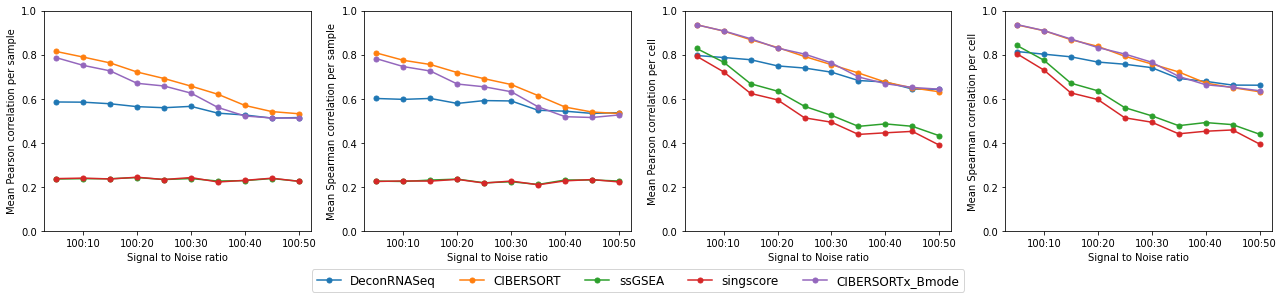

In [8]:
corr_lineplot(p_mean_corr_per_sample, p_mean_corr_per_cell, s_mean_corr_per_sample, s_mean_corr_per_cell, (22,4.2))

In [9]:
color_map = {
    'Neutrophils': 'gold',
    'Monocytes': 'yellowgreen',
    'T cells': 'darkcyan',
    'T cells CD8': 'slategrey',
    'CD8 T cells': 'slategrey',
    'T cells CD4': 'skyblue',
    'CD4 T cells': 'skyblue',
    'T cells CD4 naive': 'lightsteelblue',
    'T cells CD4 memory resting': 'cornflowerblue',
    'T cells CD4 memory activated': 'royalblue',
    'T cells gamma delta': 'orange',
    'B cells': 'lightcoral',
    'B cells naive': 'tomato',
    'B cells memory': 'lightsalmon',
    'NK cells': 'mediumorchid',
    'NK cells resting': 'orchid',
    'NK cells activated': 'darkorchid',
    'Macrophages M0': 'pink',
    'Macrophages M1': 'magenta',
    'Macrophages M2': 'darkred',
    'Dendritic cells resting': 'silver',
    'Dendritic cells activated': 'black'
}

In [10]:
_, _, p_corr_per_cell_lm22, p_corr_per_sample_lm22, s_corr_per_cell_lm22, s_corr_per_sample_lm22 = get_results_lm22(signature_df, noisy_dfs[10], gene_sets, exp_freqs, selected_cols, 10)

10


C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Trang Le\App

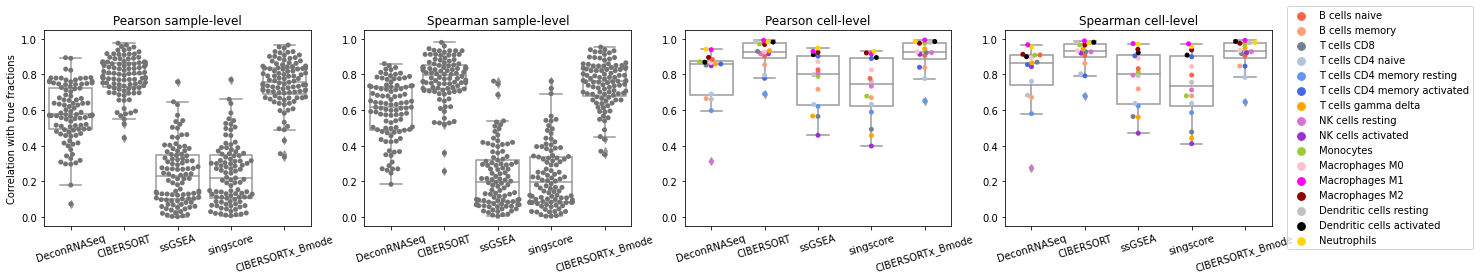

In [11]:
colors = []
for cell in p_corr_per_cell_lm22.index:
    colors.append(color_map[cell])
corr_boxplot(methods, p_corr_per_sample_lm22, s_corr_per_sample_lm22, p_corr_per_cell_lm22, s_corr_per_cell_lm22, (22,11), colors, 'Corr_simulation')

### Results with LM6

In [12]:
# Signature matrix

lm6 = pd.read_csv('Data/LM6/LM6.txt', sep='\t')
lm6.set_index('NAME', inplace=True)
# lm6.rename(columns={'CD8 T cells': 'T cells CD8', 'CD4 T cells': 'T cells CD4'}, inplace=True)

In [13]:
# Gene sets

lm6_gene_set_df = pd.read_csv('Data/LM6/Up_genes.csv')
lm6_gene_set_df.drop('Unnamed: 0', axis=1, inplace=True)

lm6_gene_sets = {}
for cell in lm6_gene_set_df.columns:
    lm6_gene_sets[cell] = lm6_gene_set_df[cell].dropna()

In [14]:
# Ground truth fractions

T_CD4_arr = ['T cells CD4 naive', 'T cells CD4 memory resting', 'T cells CD4 memory activated']
B_arr = ['B cells naive', 'B cells memory']
NK_arr = ['NK cells resting', 'NK cells activated']

def add_columns(df):
    df['CD4 T cells'] = df[T_CD4_arr].sum(axis=1)
    df['B cells'] = df[B_arr].sum(axis=1)
    df['NK cells'] = df[NK_arr].sum(axis=1)
    df.rename(columns={'T cells CD8': 'CD8 T cells'}, inplace=True)
    return df

exp_freqs = add_columns(exp_freqs)

In [15]:
def get_results_lm6(signature_df, df, gene_sets, exp_freqs, cell_types, k):
    print(k)
    
    R_Decon_freqs = pd.read_csv('Results/Simulated_data/Noisy_'+str(k)+'/LM6_'+str(k)+'_R_Decon_freqs.csv')
    R_Decon_freqs.drop('Unnamed: 0', axis=1, inplace=True)
    R_Decon_freqs.set_index('col_names', inplace=True)
    Decon_freqs = R_Decon_freqs
    Decon_freqs.columns = signature_df.columns

    CIBERSORT_freqs = pd.read_csv('Results/Simulated_data/Noisy_'+str(k)+'/LM6_'+str(k)+'_CIBERSORT_freqs.csv')
    CIBERSORT_freqs.set_index('Input Sample', inplace=True)

    R_ssGSEA_scores = pd.read_csv('Results/Simulated_data/Noisy_'+str(k)+'/LM6_'+str(k)+'_R_ssGSEA_scores.csv')
    R_ssGSEA_scores.set_index('Unnamed: 0', inplace=True)
    ssGSEA_scores = R_ssGSEA_scores.T
    ssGSEA_scores.columns = signature_df.columns
    
    sing_scores = sing_score(df, gene_sets)
    
    CIBERSORTx_freqs_Bmode = pd.read_csv('Results/Simulated_data/Noisy_'+str(k)+'/LM6_'+str(k)+'_CIBERSORTx_freqs_Bmode.csv')
    CIBERSORTx_freqs_Bmode.set_index('Mixture', inplace=True)
    
    methods = ['DeconRNASeq', 'CIBERSORT', 'ssGSEA', 'singscore', 'CIBERSORTx_Bmode']
    results = {'DeconRNASeq': Decon_freqs, 
               'CIBERSORT': CIBERSORT_freqs, 
               'ssGSEA': ssGSEA_scores, 
               'singscore': sing_scores, 
               'CIBERSORTx_Bmode': CIBERSORTx_freqs_Bmode}
    
    p_corr_per_cell, p_corr_per_sample, s_corr_per_cell, s_corr_per_sample = corr_table(methods, results, cell_types, exp_freqs)
    p_corr = corr_mean_std(p_corr_per_cell, p_corr_per_sample)
    s_corr = corr_mean_std(s_corr_per_cell, s_corr_per_sample)
    
    return p_corr, s_corr, p_corr_per_cell, p_corr_per_sample, s_corr_per_cell, s_corr_per_sample

In [16]:
methods = ['DeconRNASeq', 'CIBERSORT', 'ssGSEA', 'singscore', 'CIBERSORTx_Bmode']
p_mean_corr_per_cell2 = pd.DataFrame(columns=methods, index=np.arange(5,51,5))
p_mean_corr_per_sample2 = pd.DataFrame(columns=methods, index=np.arange(5,51,5))
s_mean_corr_per_cell2 = pd.DataFrame(columns=methods, index=np.arange(5,51,5))
s_mean_corr_per_sample2 = pd.DataFrame(columns=methods, index=np.arange(5,51,5))

for k in range(5, 51, 5):
    p_corr, s_corr, _, _, _, _ = get_results_lm6(lm6, noisy_dfs[k], lm6_gene_sets, exp_freqs, lm6.columns, k)
    p_mean_corr_per_cell2.loc[k] = p_corr['Mean_corr_per_cell']
    p_mean_corr_per_sample2.loc[k] = p_corr['Mean_corr_per_sample']
    s_mean_corr_per_cell2.loc[k] = s_corr['Mean_corr_per_cell']
    s_mean_corr_per_sample2.loc[k] = s_corr['Mean_corr_per_sample']

5
10
15
20
25
30
35
40
45
50


C:\Users\Trang Le\Documents\3rd year\Spring 2020\Research\Tumor_decon_paper\Code_submission\TumorDecon_Functions.py:172: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['100:'+str(i*10) for i in range(6)])
C:\Users\Trang Le\Documents\3rd year\Spring 2020\Research\Tumor_decon_paper\Code_submission\TumorDecon_Functions.py:179: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['100:'+str(i*10) for i in range(6)])
C:\Users\Trang Le\Documents\3rd year\Spring 2020\Research\Tumor_decon_paper\Code_submission\TumorDecon_Functions.py:186: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['100:'+str(i*10) for i in range(6)])
C:\Users\Trang Le\Documents\3rd year\Spring 2020\Research\Tumor_decon_paper\Code_submission\TumorDecon_Functions.py:193: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(['100:'+str(i*

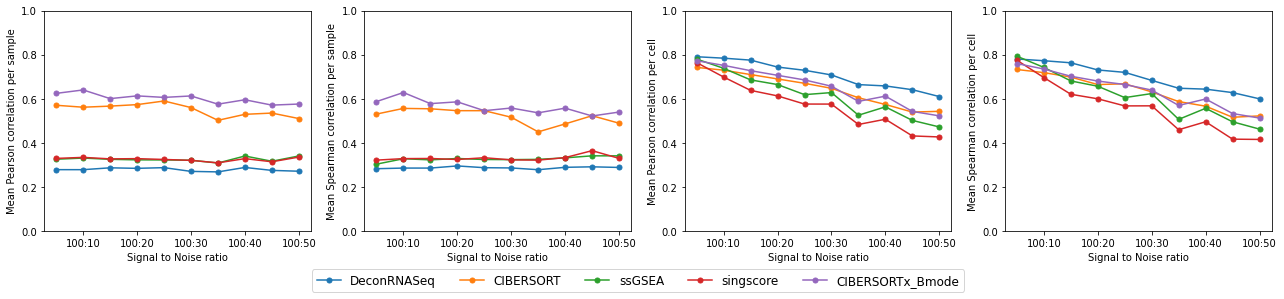

In [17]:
corr_lineplot(p_mean_corr_per_sample2, p_mean_corr_per_cell2, s_mean_corr_per_sample2, s_mean_corr_per_cell2, (22,4.2))

In [18]:
_, _, p_corr_per_cell_lm6, p_corr_per_sample_lm6, s_corr_per_cell_lm6, s_corr_per_sample_lm6 = get_results_lm6(lm6, noisy_dfs[10], lm6_gene_sets, exp_freqs, lm6.columns, 10)

10


C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 6.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Trang Le\AppData\Roaming\Python\Python36\site-packages\seaborn\categorical.py:1296: UserWarning: 13.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


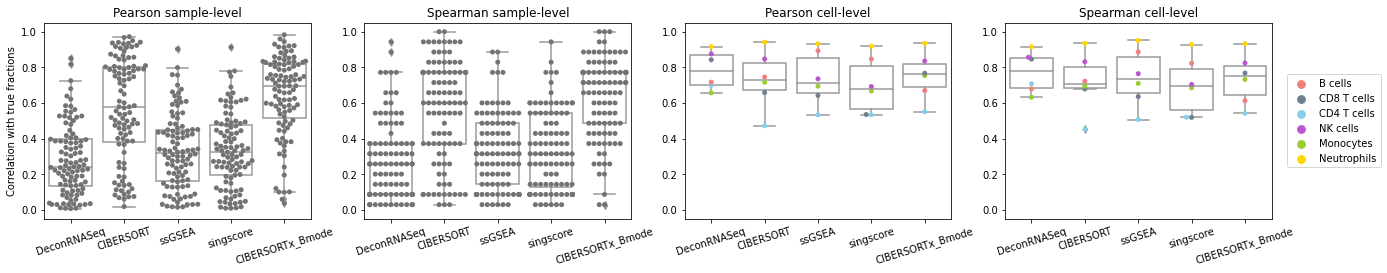

In [19]:
colors = []
for cell in p_corr_per_cell_lm6.index:
    colors.append(color_map[cell])
corr_boxplot(methods, p_corr_per_sample_lm6, s_corr_per_sample_lm6, p_corr_per_cell_lm6, s_corr_per_cell_lm6, (22,10), colors, 'LM6_Corr_simulation')